In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import classification_report as cr

In [3]:
cd = pd.read_csv("D:/DS Files/DS Assingments/Excel Data Sheets/iris.csv",index_col=0)

In [4]:
cd.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
cd.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [6]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()


In [7]:
# after preprocessing the cateagory data into numerical data
cd['Species'] = label.fit_transform(cd.Species)

In [8]:
cd

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [9]:
cd.Species.nunique()

3

In [10]:
# now divide our data into iput and output variables
x = cd.iloc[:,0:4]
y = cd['Species']

In [11]:
y

1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [29]:
x_train,x_test,y_train,y_test = tt(x,y,test_size = 0.3)
print(x_test,y_test)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
57            6.3          3.3           4.7          1.6
106           7.6          3.0           6.6          2.1
22            5.1          3.7           1.5          0.4
132           7.9          3.8           6.4          2.0
112           6.4          2.7           5.3          1.9
56            5.7          2.8           4.5          1.3
107           4.9          2.5           4.5          1.7
48            4.6          3.2           1.4          0.2
29            5.2          3.4           1.4          0.2
73            6.3          2.5           4.9          1.5
140           6.9          3.1           5.4          2.1
42            4.5          2.3           1.3          0.3
118           7.7          3.8           6.7          2.2
41            5.0          3.5           1.3          0.3
61            5.0          2.0           3.5          1.0
38            4.9          3.6           1.4          0.1
94            

In [30]:
model = dtc(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

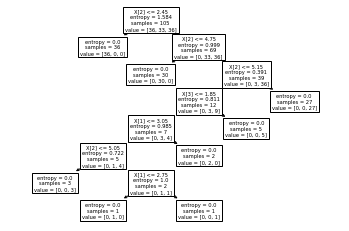

In [23]:
tree.plot_tree(model);

In [31]:
pred = model.predict(x_test)
pred

array([1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       2])

In [28]:
ct = pd.crosstab(y_test,pred)

In [26]:
ct

col_0,0,1,2
Species,,,
0,14,0,0
1,0,14,3
2,0,1,13
